# Visualization Practice
### My attempt to visualize a very small dataset but with multiple features, as succinctly as possible in one graph

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/ex1.csv',header=0)
df.rename(columns={'Company Name':'ind'},inplace=True)
df.set_index('ind', inplace=True)
df.rename(index={'Market share  Asia':'mkt', 'Net earnings (EU$)':'earn', '2007 Patents ':'pat'},
          inplace=True)
df.iloc[:5] /= 1000
df.loc['mkt'] = [4, 12, 1.2]
df

,CSR Asia,St Gobain Asia,Roxul
ind,,,
Rockwool,100.0,0.0,200.0
R-prod,65.0,0.0,120.0
Glasswool,600.0,1000.0,2500.0
G-prod,320.0,970.0,2400.0
earn,800.0,2000.0,1200.0
mkt,4.0,12.0,1.2
pat,8.0,23.0,190.0


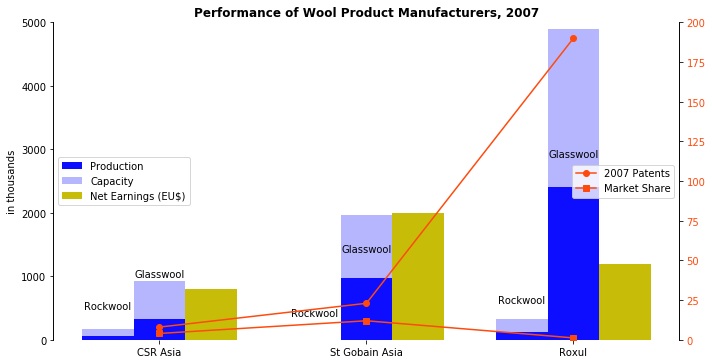

In [6]:
comp = df.columns.tolist()
x = np.arange(len(comp))

rw_cap = df.loc['Rockwool'].tolist()
rw_pro = df.loc['R-prod'].tolist()
gw_cap = df.loc['Glasswool'].tolist()
gw_pro = df.loc['G-prod'].tolist()

width = 0.25
margin = width / 3

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(x-margin*3, rw_pro, width, color='#0d0dff', label='Production')
ax.bar(x, gw_pro, width, color='#0d0dff')

rects1 = ax.bar(x-margin*3, rw_cap, width, bottom=rw_pro, color='#0d0dff', alpha=0.3, label='Capacity')
rects2 = ax.bar(x, gw_cap, width, bottom=gw_pro, color='#0d0dff', alpha=0.3)

rects3 = ax.bar(x+margin*3, df.loc['earn'], width, label='Net Earnings (EU$)', color='#C7BD09')

ax.set_xticklabels(comp)
ax.set_ylim([0,5000])
ax.set_ylabel('in thousands')

ax.legend(loc=6)

# twin axes

ax2 = ax.twinx()
ax2.plot(comp, df.loc['pat'], marker='o', label='2007 Patents', zorder=1, color='#ff4a0d')
ax2.plot(comp, df.loc['mkt'], marker='s', label='Market Share', zorder=1, color='#ff4a0d')

ax2.set_ylim([0,200])
ax2.tick_params(axis='y', labelcolor='#ff4a0d')
ax2.legend(loc=7)

def autolabel(rects, text):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height() + 300
        ax.annotate('{}'.format(text),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize='medium')
        
autolabel(rects1, 'Rockwool')
autolabel(rects2, 'Glasswool')

for ax in [ax, ax2]:
    for spine in ax.spines.values():
        if spine.spine_type == 'top' or spine.spine_type == 'bottom': 
            spine.set_visible(False)
        

fig.tight_layout()
plt.title('Performance of Wool Product Manufacturers, 2007', weight='semibold', size=12)
plt.savefig(fname='../docs/assets/img/ex1.png', bbox_inches='tight', dpi=75)
plt.show()

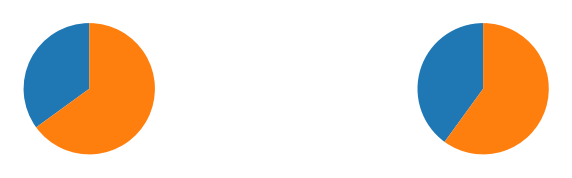

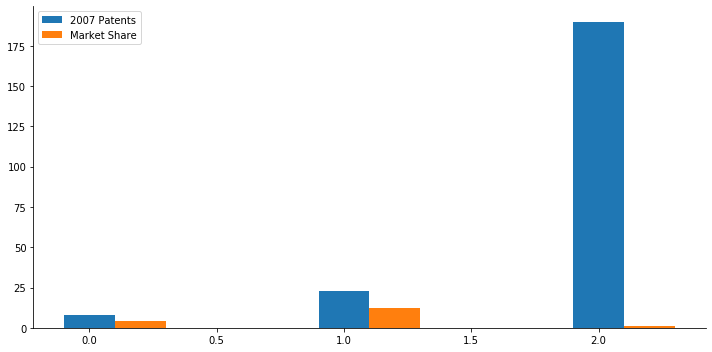

In [198]:
comp = df.columns.tolist()
x = np.arange(len(comp))

rw = [list(a) for a in list(zip([35.0, 0.0, 80.0], rw_pro))]
gw = [list(a) for a in list(zip([280.0, 30.0, 1000.0], gw_pro))]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(10,5))
ax1.pie(rw[0], startangle=90)
ax2.pie(rw[1], startangle=90)
ax3.pie(rw[2], startangle=90)

width = 0.2
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, df.loc['pat'], width, label='2007 Patents')
ax.bar(x+width, df.loc['mkt'], width, label='Market Share')

ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
plt.show()